In [56]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import precision_recall_fscore_support, make_scorer, recall_score, f1_score, confusion_matrix, precision_score, balanced_accuracy_score
from sklearn.metrics import fbeta_score, classification_report


from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from libs.print_cm import print_cm
from libs.loader import load_malicious, load_malicious_test_untouched

         

from sklearn.model_selection import learning_curve, validation_curve

In [86]:
df = pd.read_csv("data/malicious_01.csv")
Xdf = df.drop(columns=["INCIDENT_ID","DATE", "MALICIOUS_OFFENSE"])
y_mal = df["MALICIOUS_OFFENSE"]
Xdf['X_12'] = np.nan_to_num(Xdf['X_12'])
_X, _y = Xdf.values, y_mal.values

# minMaxNorm = MinMaxScaler()
# X = minMaxNorm.fit_transform(_X)
# # pd.DataFrame(X)

# labelEncoder = LabelEncoder()
# y_pre = labelEncoder.fit_transform(_y)
# y = 1 - y_pre
# pd.DataFrame({'y':y,'y_pre':y_pre})

y = 1 - _y
X = _X

##############################

# X,y = load_malicious()
# y_df = pd.DataFrame({'y':y})
# y_df[(y_df['y'] == 1)].shape
# y_df.shape

# Xt, yt = load_malicious_test_untouched()
# yt[yt ==1].shape

In [111]:
knn = KNeighborsClassifier(weights='distance', metric='chebyshev')

# scorer = make_scorer(precision_score, pos_label=0 )
scorer = make_scorer(recall_score)
# scorer = make_scorer(recall_score,average='weighted')
# scorer = make_scorer(f1_score, average='weighted' )
# scorer = make_scorer(f1_score, pos_label=1)


cv_target = cross_validate(knn, X, y, cv=3, scoring=scorer)
cv_target

{'fit_time': array([0.03470421, 0.03110886, 0.02890801]),
 'score_time': array([0.12327671, 0.11084318, 0.10663199]),
 'test_score': array([0.41853933, 0.49438202, 0.44382022])}

In [112]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y,random_state=0)
knn.fit(X_train,y_train)
pass
print(f"Xtype:{type(X_train)} ytype:{type(y_train)}")

Xtype:<class 'numpy.ndarray'> ytype:<class 'numpy.ndarray'>


In [113]:
def stats_pac( label, estimator, X_data, y_data ):
    predicted = estimator.predict(X_data)
    print ('****** %s ******' % label)
    cm = confusion_matrix(y_data, predicted)
    print ('Confusion matrix')
    print_cm(cm, labels=['0','1'])
    
    print ('Recall - label 0: %0.4f'% recall_score(y_data, predicted, pos_label=0))
    print ('Recall - label 1: %0.4f'% recall_score(y_data, predicted))

    print ('Precsion - label 0: %0.4f'% precision_score(y_data, predicted, pos_label=0))
    print ('Precsion - label 1: %0.4f'% precision_score(y_data, predicted))
    
    sample_wt = [ 3 if i == 1 else 1 for i in predicted]
    print ('F1 Score macro: %0.4f'% f1_score(y_data, predicted, average='macro', sample_weight=sample_wt ))
    print ('F1 Score - label 0 : %0.4f'% f1_score(y_data, predicted, pos_label=0 ))
    print ('F1 Score - label 1 : %0.4f'% f1_score(y_data, predicted, pos_label=1 ))
    print ('F1 Score - weighted avg : %0.4f'% f1_score(y_data, predicted, average='weighted' ))
    print ('F1 Beta - b=2 weighted avg : %0.4f'% fbeta_score(y_data,predicted, average='weighted', beta=2))
    
    print (classification_report(y_data, predicted, labels=[1,0]))


stats_pac('Knn plain - Train', knn, X_train, y_train)
stats_pac('Knn plain - Validation', knn, X_test, y_test)

****** Knn plain - Train ******
Confusion matrix
              0     1 
        0 18230     0 
        1     0   854 
Recall - label 0: 1.0000
Recall - label 1: 1.0000
Precsion - label 0: 1.0000
Precsion - label 1: 1.0000
F1 Score macro: 1.0000
F1 Score - label 0 : 1.0000
F1 Score - label 1 : 1.0000
F1 Score - weighted avg : 1.0000
F1 Beta - b=2 weighted avg : 1.0000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       854
           0       1.00      1.00      1.00     18230

    accuracy                           1.00     19084
   macro avg       1.00      1.00      1.00     19084
weighted avg       1.00      1.00      1.00     19084

****** Knn plain - Validation ******
Confusion matrix
              0     1 
        0  4535    23 
        1   111   103 
Recall - label 0: 0.9950
Recall - label 1: 0.4813
Precsion - label 0: 0.9761
Precsion - label 1: 0.8175
F1 Score macro: 0.8775
F1 Score - label 0 : 0.9854
F1 Score - label 1 : 0.60

## K value

In [66]:
scorer

make_scorer(recall_score)

In [114]:
## Plot iterations
knn_target =  KNeighborsClassifier(weights='distance', metric='chebyshev')
# knn_target = KNeighborsClassifier()
print(knn_target.get_params())
strat_cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)

range_list = np.linspace(1, 20, 20).astype('int32')
range_list

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'chebyshev', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int32)

In [115]:
strat_cv

StratifiedKFold(n_splits=3, random_state=0, shuffle=True)

In [116]:
mlp_train_scores, mlp_test_scores = validation_curve(
    knn_target, X, y, param_name="n_neighbors", param_range=range_list,
    scoring=scorer, cv=strat_cv, n_jobs=-1)

In [117]:

train_scores_mean = np.mean(mlp_train_scores, axis=1)
test_scores_mean = np.mean(mlp_test_scores, axis=1)
print (range_list.shape,train_scores_mean.shape,test_scores_mean.shape)
df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )
df_1

(20,) (20,) (20,)


,x,train,test
0,1,1.0,0.586142
1,2,1.0,0.558052
2,3,1.0,0.518727
3,4,1.0,0.498127
4,5,1.0,0.461610
5,6,1.0,0.441948
6,7,1.0,0.421348
7,8,1.0,0.404494
8,9,1.0,0.385768
9,10,1.0,0.378277


Text(0.5, 1.0, 'KNN K Curve')

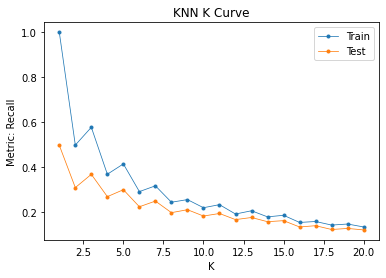

In [102]:
axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Train', linewidth=0.75, marker='.')
axs.plot(df_1['x'], df_1['test'], label='Test', linewidth=0.75, marker='.')
axs.legend(); axs.set_ylabel("Metric: Recall"); axs.set_xlabel("K")
axs.set_title('KNN K Curve')

In [108]:
knn_target2 =  KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
knn_target2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'distance'}

In [109]:
range_list = [ 'chebyshev','euclidean', 'manhattan',
                              'minkowski',  'seuclidean', 
                             'wminkowski']

In [110]:
knn_train_scores, knn_test_scores = validation_curve(
    knn_target2, X, y, param_name="metric", param_range=range_list,
    scoring=scorer, cv=strat_cv, n_jobs=-1)

train_scores_mean = np.mean(knn_train_scores, axis=1)
test_scores_mean = np.mean(knn_test_scores, axis=1)
# print (range_list.shape,train_scores_mean.shape,test_scores_mean.shape)
df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )
df_1

/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 499, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn/neighbors/_binary_tree.pxi", line 1063, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklea

,x,train,test
0,chebyshev,1.0,0.586142
1,euclidean,1.0,0.546816
2,manhattan,1.0,0.497191
3,minkowski,1.0,0.546816
4,seuclidean,NaN,NaN
5,wminkowski,NaN,NaN


In [31]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the sa